# The Effect of Potential Growth Assumptions on Adjustment Targets in Germany

This file uses the European Commission's DSA model to assess the sensitivity of German SPB targets to potential growth assumptions under the new EU Fiscal Rules.

Scenarios assume a unifrom level shift in future potential growth between 0 and 1 percentage point.

In [1]:
# Set autoreleoad
%load_ext autoreload
%autoreload 2

# Import libraries and modules
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import DSA model class and stochastic subclass
sys.path.append(os.path.abspath('..'))
from classes import StochasticDsaModel as dsa
from functions import *

In [7]:
# initialize target_dict and loop through adjustment periods and rg_adj values
target_dict = {}
rg_dict = {}
for period in [4,7]:
    target_dict[period] = {}
    for rg_adj in np.linspace(0,1,11):

        # initialize DSA model for Germany
        model = dsa('DEU', adjustment_period=period)
        
        # adjust potential GDP growth
        for t in range(1, model.projection_period):
            model.rg_pot[t] += rg_adj
            model.rgdp_pot[t] = model.rgdp_pot[t - 1] * (1 + model.rg_pot[t] / 100)
        model.rg_pot_bl = model.rg_pot.copy()
        model.rgdp_pot_bl = model.rgdp_pot.copy()
        model._project_gdp() # recalculate GDP and output gap
        rg_dict[rg_adj] = model.rg_pot.copy()

        # calculate adjustment requirements and save results
        model.find_spb_binding(edp=False, print_results=False)
        target = model.spb_target_dict['binding']
        target_dict[period][rg_adj] = target
        print(f'Period: {period}, rg_adj: {rg_adj:.2f}, target: {target:.2f}')

Period: 4, rg_adj: 0.00, target: 0.76
Period: 4, rg_adj: 0.10, target: 0.69
Period: 4, rg_adj: 0.20, target: 0.62
Period: 4, rg_adj: 0.30, target: 0.55
Period: 4, rg_adj: 0.40, target: 0.48
Period: 4, rg_adj: 0.50, target: 0.41
Period: 4, rg_adj: 0.60, target: 0.34
Period: 4, rg_adj: 0.70, target: 0.28
Period: 4, rg_adj: 0.80, target: 0.21
Period: 4, rg_adj: 0.90, target: 0.14
Period: 4, rg_adj: 1.00, target: 0.07
Period: 7, rg_adj: 0.00, target: 0.54
Period: 7, rg_adj: 0.10, target: 0.46
Period: 7, rg_adj: 0.20, target: 0.39
Period: 7, rg_adj: 0.30, target: 0.31
Period: 7, rg_adj: 0.40, target: 0.24
Period: 7, rg_adj: 0.50, target: 0.16
Period: 7, rg_adj: 0.60, target: 0.09
Period: 7, rg_adj: 0.70, target: 0.02
Period: 7, rg_adj: 0.80, target: -0.06
Period: 7, rg_adj: 0.90, target: -0.13
Period: 7, rg_adj: 1.00, target: -0.20


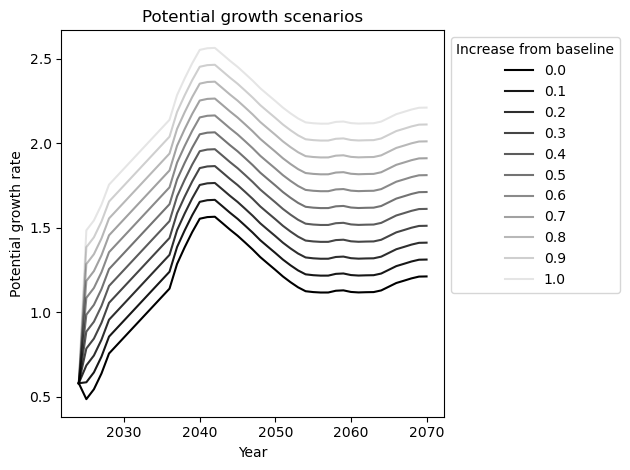

In [34]:
# Sort the dictionary items by key
plt.figure()
for i, (rg_adj, rg_pot) in enumerate(rg_dict.items()):
    plt.plot(range(2024, 2071), rg_pot, label=f'{rg_adj:.1f}', 
             alpha=(1 - i * 0.09), color='black')
plt.title('Potential growth scenarios')
plt.xlabel('Year')
plt.ylabel('Potential growth rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Increase from baseline')
plt.tight_layout()

In [35]:
# Create DataFrame with results
results_df = pd.DataFrame.from_dict(
    {period: {rg_adj: target_dict[period][rg_adj] for rg_adj in target_dict[period]} for period in target_dict},
    orient='index'
).T.reset_index().round(3)
results_df.columns = ['Potential growth effect', 'SPB target (4-year)', 'SPB target (7-year)']
results_df

,Potential growth effect,SPB target (4-year),SPB target (7-year)
0,0.000,0.757,0.538
1,0.100,0.687,0.462
2,0.200,0.618,0.387
3,0.300,0.549,0.312
4,0.400,0.480,0.238
5,0.500,0.412,0.164
6,0.600,0.344,0.090
7,0.700,0.276,0.016
8,0.800,0.209,-0.056
9,0.900,0.141,-0.129


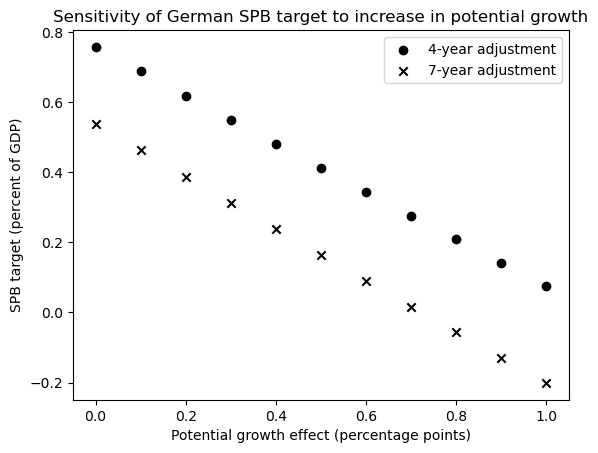

In [36]:
# plot results
plt.figure()
plt.scatter(results_df['Potential growth effect'], results_df['SPB target (4-year)'], label='4-year adjustment', marker='o', color='black')
plt.scatter(results_df['Potential growth effect'], results_df['SPB target (7-year)'], label='7-year adjustment', marker='x', color='black')
plt.title('Sensitivity of German SPB target to increase in potential growth')
plt.xlabel('Potential growth effect (percentage points)')
plt.ylabel('SPB target (percent of GDP)')
plt.legend()

In [37]:
# calculate slope of adjustment effect
slope_4 = np.polyfit(results_df['Potential growth effect'], results_df['SPB target (4-year)'], 1)[0]
slope_7 = np.polyfit(results_df['Potential growth effect'], results_df['SPB target (7-year)'], 1)[0]
print(f"Slope of regression line for 4-year adjustment: {slope_4:.2f}")
print(f"Slope of regression line for 7-year adjustment: {slope_7:.2f}")

Slope of regression line for 4-year adjustment: -0.68
Slope of regression line for 7-year adjustment: -0.74
